# COURSERA CAPSTONE

### Introduction/Business Plan

This project aims to take the data of the most common causes of traffic accidents and collisions based on factors such as <b>Weather, Location, Injuries, Speeding, Fatalities</b>, as well as the different types of accidents based on the <i>Seattle Collision Code</i> and whether the individuals in the accident were <b>Under the Influence</b>.   Using that data I will develop a model using <b>K-Nearest Neighbor, Decision Trees and Logistic Regression </b> that can look at these variables and figure out how to minimize the risk of some of these factors happening again.

### Data

The dataset “Data Collsions.csv” is provided by the Seattle Police Department and Seattle Traffic Management. The data  covers traffic accidents in the city from 2004 to present day.  The dataset includes information on the location of the accident, as well as how many drivers, pedestrians and vehicles were involved, weather conditions and whether it was day or night. As well as other specific details about each individual incident. I plan on converting factors such as <b> Speeding, Under The Influence, Hit Parked Car & Severity Code </b> into Dummy Variables for building a logistic regression model. I also want to use the location data to cluster the accidents and use K-Nearest Neighbor to search for patterns based on the clusters and hopefully predict patterns based on where the accidents happen.


## Loading the Data

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss, jaccard_similarity_score, f1_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [2]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

Solving environment: done

# All requested packages already installed.



In [3]:
location = "Data_Collisions.csv"
df = pd.read_csv(location)

/Users/jgacuca/Desktop/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Examining the Data

In [4]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
df.describe(include = "all")

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1776526,Matched,Block,NaN,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,...,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,...,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,...,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,...,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


In [6]:
df.shape

(194673, 38)

In [7]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [8]:
df.drop(['SEVERITYCODE.1','OBJECTID'], inplace = True, axis=1)

In [9]:
df.describe(include = "all")

,SEVERITYCODE,X,Y,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,191996,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,24102,...,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,1776526,Matched,Block,NaN,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,276,...,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,NaN,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,NaN,...,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,NaN,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,NaN,...,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,NaN,...,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,NaN,...,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


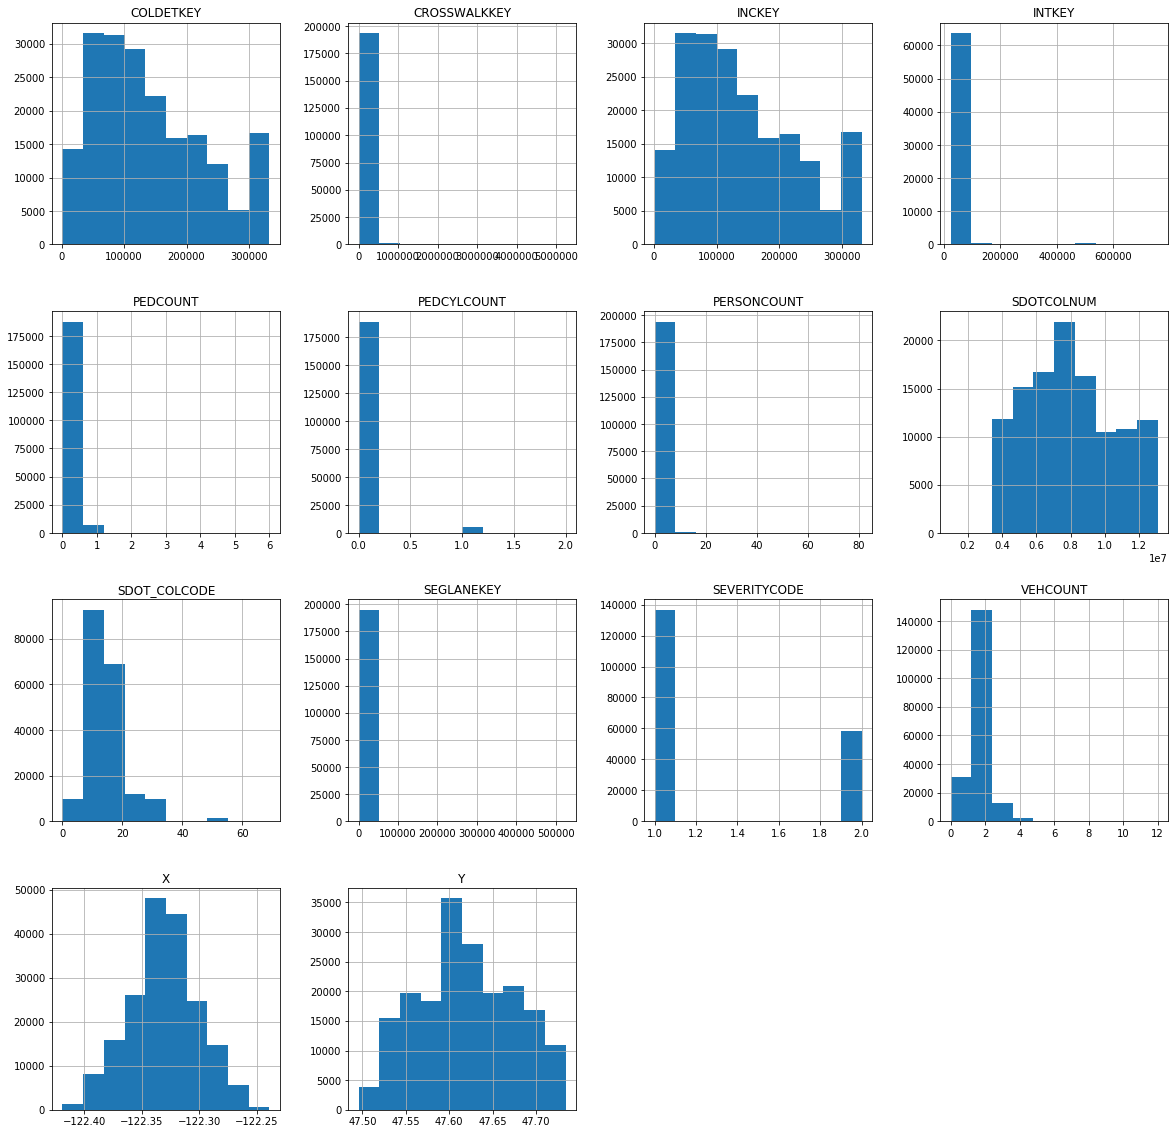

In [10]:
df.hist(figsize=(20,20))
plt.show()

# Hot Encoding Variables

In [11]:
df['WEATHER'].replace(np.nan,'0', inplace=True)

In [12]:
df['WEATHER'].isnull().sum()

0

In [13]:
str(df['WEATHER'])

'0         Overcast\n1          Raining\n2         Overcast\n3            Clear\n4          Raining\n            ...   \n194668       Clear\n194669     Raining\n194670       Clear\n194671       Clear\n194672       Clear\nName: WEATHER, Length: 194673, dtype: object'

In [14]:
df['WEATHER'].dtypes

dtype('O')

In [15]:
e= LabelEncoder()

In [16]:
df['WEATHER'] = e.fit_transform(df['WEATHER'])

In [17]:
df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [18]:
df['LIGHTCOND'].isnull().sum()

5170

In [19]:
df['LIGHTCOND'].replace(np.nan,'0', inplace=True)

In [20]:
df['LIGHTCOND'] = e.fit_transform(df['LIGHTCOND'])

In [21]:
df['ROADCOND'].isnull().sum()

5012

In [22]:
df['ROADCOND'].replace(np.nan,'0', inplace=True)

In [23]:
df['ROADCOND'] = e.fit_transform(df['ROADCOND'])

## Converting Categorical Data into Dummy Variables & Cleaning Other Variables

Convert Speeding to Dummy Variables "0" = "Did not speed" & "1" = "Speeding"

In [24]:
df['SPEEDING'].isnull().sum()

185340

In [25]:
df['SPEEDING'].replace(np.nan,0, inplace=True)
df['SPEEDING'].replace('N',0, inplace=True)
df['SPEEDING'].replace('Y',1, inplace=True)

In [26]:
df['SPEEDING'].isnull().sum()

0

In [27]:
df['SPEEDING'].value_counts()

0    185340
1      9333
Name: SPEEDING, dtype: int64

Convert "Under the Influence" to Dummy Variables "0" = "Was not Under the Influence" & "1" = "Under the Influence"

In [28]:
df['UNDERINFL'].value_counts()

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

In [29]:
df['UNDERINFL'].replace("N",0, inplace=True)
df['UNDERINFL'].replace(np.nan,0, inplace=True)
df['UNDERINFL'].replace("Y",1, inplace=True)

In [30]:
df['UNDERINFL'].value_counts()

0    105158
0     80394
1      5126
1      3995
Name: UNDERINFL, dtype: int64

Convert "Hit Parked Car" to Dummy Variables "0" = "Did not hit parked car" & "1" = "hit parked car"

In [31]:
df['HITPARKEDCAR'].value_counts()

N    187457
Y      7216
Name: HITPARKEDCAR, dtype: int64

In [32]:
df['HITPARKEDCAR'].replace("N",0, inplace=True)
df['HITPARKEDCAR'].replace(np.nan,0, inplace=True)
df['HITPARKEDCAR'].replace("Y",1, inplace=True)

Convert "Pedestrian Right Of Way Not Granted" to Dummy Variables "0" = "Not Granted" & "1" = "Granted"

In [33]:
df['PEDROWNOTGRNT'].value_counts()

Y    4667
Name: PEDROWNOTGRNT, dtype: int64

In [34]:
df['PEDROWNOTGRNT'].shape

(194673,)

In [35]:
df['PEDROWNOTGRNT'].replace("N",0, inplace=True)
df['PEDROWNOTGRNT'].replace(np.nan,0, inplace=True)
df['PEDROWNOTGRNT'].replace("Y",1, inplace=True)

In [36]:
df['PEDROWNOTGRNT'].value_counts()

0    190006
1      4667
Name: PEDROWNOTGRNT, dtype: int64

Convert "Severity Code" to Dummy Variables "0" = "Prop Damage" & "1" = "Serious Injury"

In [37]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [38]:
df['SEVERITYCODE'].isnull().sum()

0

In [39]:
df['SEVERITYCODE'].replace(1,0, inplace=True)
df['SEVERITYCODE'].replace(2,1, inplace=True)

In [40]:
df['SEVERITYCODE'].value_counts()

0    136485
1     58188
Name: SEVERITYCODE, dtype: int64

Convert "Innattention" to Dummy Variables "0" = "N" & "1" = "Y"

In [41]:
df['INATTENTIONIND'].value_counts()

Y    29805
Name: INATTENTIONIND, dtype: int64

In [42]:
df['INATTENTIONIND'].replace("N",0, inplace=True)
df['INATTENTIONIND'].replace(np.nan,0, inplace=True)
df['INATTENTIONIND'].replace("Y",1, inplace=True)

In [43]:
df['INATTENTIONIND'].value_counts()

0    164868
1     29805
Name: INATTENTIONIND, dtype: int64

In [44]:
df['ADDRTYPE'].value_counts()

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [45]:
df['ADDRTYPE'].isnull().sum()

1926

In [46]:
df['ADDRTYPE'].isnull().sum()
df['ADDRTYPE'].replace(np.nan,0, inplace=True)

In [47]:
df['ADDRTYPE'].value_counts()

Block           126926
Intersection     65070
0                 1926
Alley              751
Name: ADDRTYPE, dtype: int64

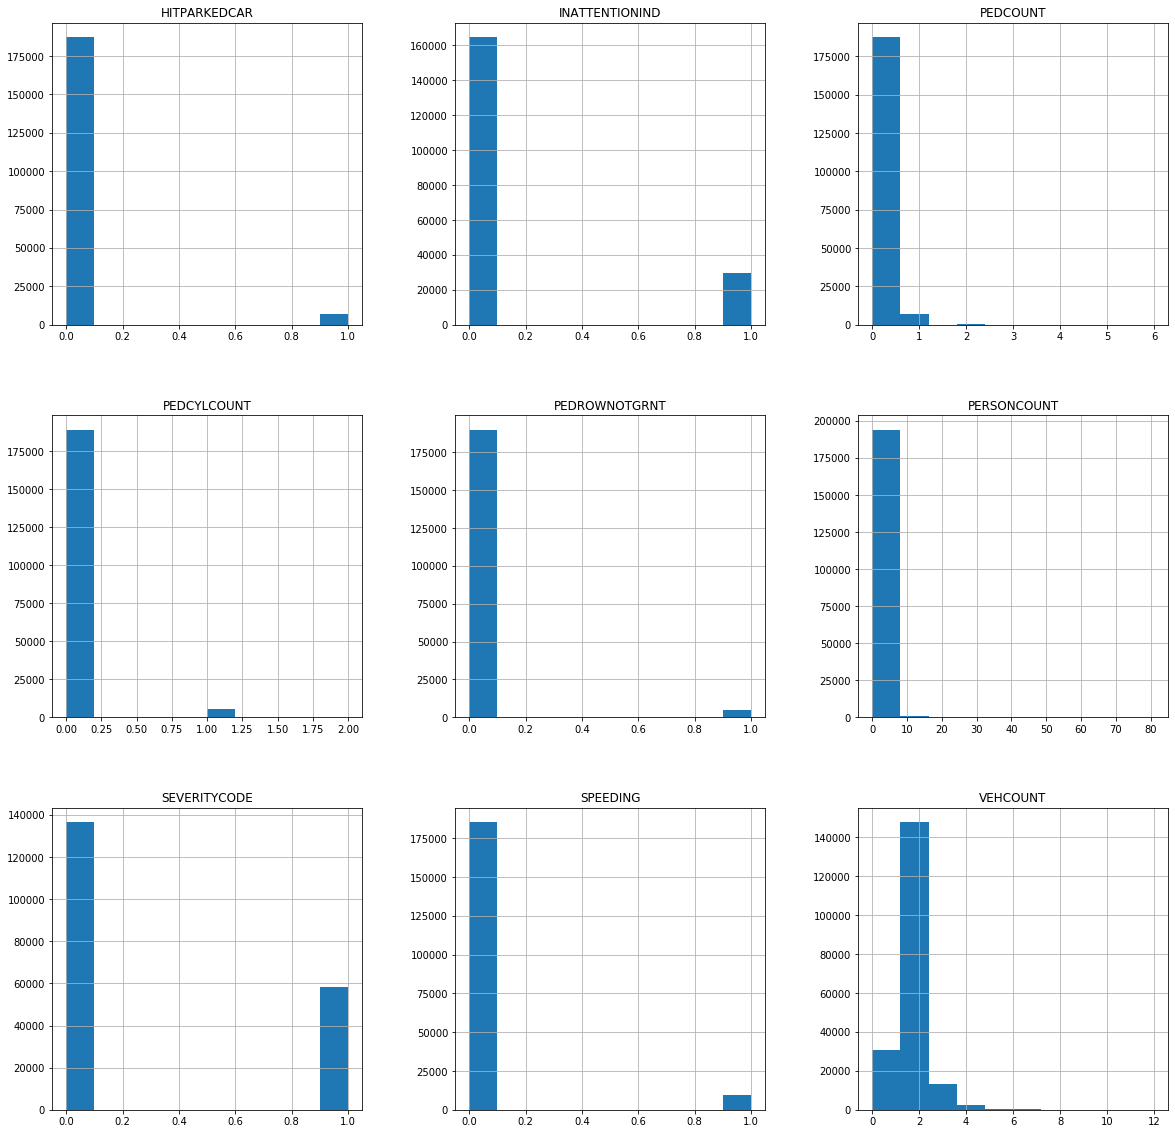

In [48]:
df[['PERSONCOUNT','VEHCOUNT','HITPARKEDCAR','PEDCOUNT','UNDERINFL','SPEEDING', 'PEDROWNOTGRNT','PEDCYLCOUNT','INATTENTIONIND','SEVERITYCODE']].hist(figsize=(20,20))
plt.show()

In [49]:
primedata = df[['PERSONCOUNT','VEHCOUNT','HITPARKEDCAR','PEDCOUNT','UNDERINFL','SPEEDING', 'PEDROWNOTGRNT','PEDCYLCOUNT','ROADCOND','LIGHTCOND','WEATHER','INATTENTIONIND','SEVERITYCODE']]

In [50]:
primedata.corr()

,PERSONCOUNT,VEHCOUNT,HITPARKEDCAR,PEDCOUNT,SPEEDING,PEDROWNOTGRNT,PEDCYLCOUNT,ROADCOND,LIGHTCOND,WEATHER,INATTENTIONIND,SEVERITYCODE
PERSONCOUNT,1.000000,0.380523,-0.052766,-0.023464,-0.002963,-0.027449,-0.038809,-0.020697,-0.004291,-0.047186,0.077435,0.130949
VEHCOUNT,0.380523,1.000000,0.048845,-0.261285,-0.025743,-0.227990,-0.253773,0.061051,0.244107,0.100312,0.076277,-0.054686
HITPARKEDCAR,-0.052766,0.048845,1.000000,-0.035264,-0.028374,-0.030749,-0.030187,0.017040,0.021109,0.055640,0.011946,-0.101498
PEDCOUNT,-0.023464,-0.261285,-0.035264,1.000000,-0.032838,0.494641,-0.016920,0.009098,-0.022708,-0.006316,-0.004315,0.246338
SPEEDING,-0.002963,-0.025743,-0.028374,-0.032838,1.000000,-0.028410,-0.020391,0.092804,-0.072967,0.043343,-0.048805,0.038938
PEDROWNOTGRNT,-0.027449,-0.227990,-0.030749,0.494641,-0.028410,1.000000,0.323652,0.001972,-0.001832,-0.010727,-0.026442,0.206283
PEDCYLCOUNT,-0.038809,-0.253773,-0.030187,-0.016920,-0.020391,0.323652,1.000000,-0.045831,0.022355,-0.047333,0.004073,0.214218
ROADCOND,-0.020697,0.061051,0.017040,0.009098,0.092804,0.001972,-0.045831,1.000000,0.094970,0.755336,-0.045013,-0.043377
LIGHTCOND,-0.004291,0.244107,0.021109,-0.022708,-0.072967,-0.001832,0.022355,0.094970,1.000000,0.286380,0.028741,-0.038968
WEATHER,-0.047186,0.100312,0.055640,-0.006316,0.043343,-0.010727,-0.047333,0.755336,0.286380,1.000000,-0.065581,-0.099871


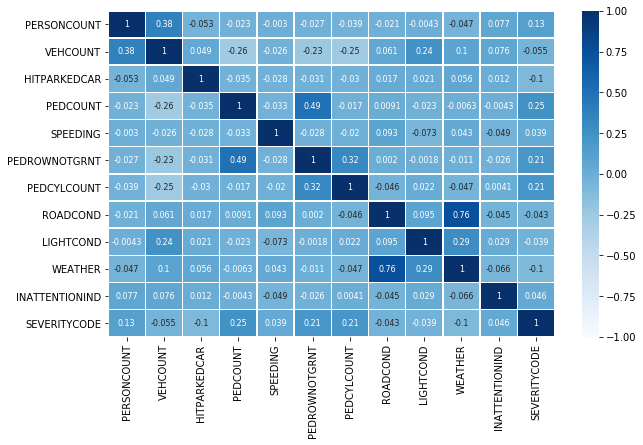

In [51]:
plt.figure(figsize = (10,6))
sns.heatmap(primedata.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='Blues',linewidths=0.5, annot_kws={'size':8})

# K- Nearest Neighbors

In [52]:
X = df[['WEATHER','ROADCOND','LIGHTCOND','PEDROWNOTGRNT','INATTENTIONIND','SPEEDING','PEDCOUNT','VEHCOUNT']] .values  
X[0:5]

array([[5, 9, 6, 0, 0, 0, 0, 2],
       [7, 9, 3, 0, 0, 0, 0, 2],
       [5, 1, 6, 0, 0, 0, 0, 3],
       [2, 1, 6, 0, 0, 0, 0, 3],
       [7, 9, 6, 0, 0, 0, 0, 2]])

In [53]:
y = df['SEVERITYCODE'].values
y [0:5]

array([1, 0, 0, 0, 1])

Pre-Processing

In [54]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.35364615,  1.50545441,  0.3912104 , -0.1567239 , -0.42518348,
        -0.22440165, -0.18743029,  0.12553783],
       [ 1.04520829,  1.50545441, -1.18714134, -0.1567239 , -0.42518348,
        -0.22440165, -0.18743029,  0.12553783],
       [ 0.35364615, -0.68713674,  0.3912104 , -0.1567239 , -0.42518348,
        -0.22440165, -0.18743029,  1.7102107 ],
       [-0.68369706, -0.68713674,  0.3912104 , -0.1567239 , -0.42518348,
        -0.22440165, -0.18743029,  1.7102107 ],
       [ 1.04520829,  1.50545441,  0.3912104 , -0.1567239 , -0.42518348,
        -0.22440165, -0.18743029,  0.12553783]])

In [55]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 8) (155738,)
Test set: (38935, 8) (38935,)


Training

In [56]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [57]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 0, 0, 0])

In [58]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7064557140839102
Test set Accuracy:  0.70766662386028


In [59]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
    

In [60]:
for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

In [61]:
mean_acc

array([0.63790934, 0.70360858, 0.67322461, 0.70766662, 0.67902915,
       0.72366765, 0.60089893, 0.72487479, 0.72127905])

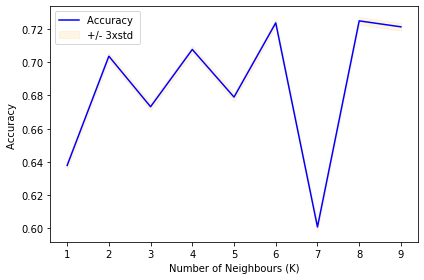

In [62]:
plt.plot(range(1,Ks),mean_acc,'b')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10, color='orange')
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

In [63]:
print( "The best accuracy is :", mean_acc.max(), "when k=", mean_acc.argmax()+1) 

#K-Nearest Neighbours evaluation metrics

knn1 = jaccard_similarity_score(y_test, yhat)
knn2 = f1_score(y_test, yhat, average='weighted')

print(knn1, knn2)

The best accuracy is : 0.7248747913188648 when k= 8
0.7212790548349813 0.6796360012425189


/Users/jgacuca/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


# Decision Tree

In [64]:
#Decision Tree
SeverityTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4) 
SeverityTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [65]:
predTree = SeverityTree.predict(X_test)

In [66]:
#Decision Tree evaluation metrics

dt1 = jaccard_similarity_score(y_test, predTree)
dt2 = f1_score(y_test, predTree, average='weighted')
dtac = accuracy_score(y_test, predTree)

/Users/jgacuca/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [67]:
print(predTree[0:101])
print(y_test[0:101])
print(dt1,dt2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
[1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1
 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0]
0.7392834210864261 0.6627023610604361


# Logistic Regression

Normalize the dataset

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

### Train/Test Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

### Modeling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

In [ ]:
yhat = LR.predict(X_test)
yhat

In [ ]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

### Evaluation

Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['SEVERITYCODE=1','SEVERITYCODE=0'],normalize= False,  title='Confusion matrix')

In [ ]:
print (classification_report(y_test, yhat))

Jaccard Index

In [ ]:
lr1 = jaccard_similarity_score(y_test, yhat)
lr1

F1 Score

In [ ]:
lr2 = f1_score(y_test, yhat, average='weighted')
lr2

In [ ]:
lr3 = log_loss(y_test, yhat_prob)

In [ ]:
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, yhat))

## Accuracy Table

In [ ]:
jss_list = [knn1, dt1, lr1]
f1s_list = [knn2, dt2, lr2]
ll_list = ['NA', 'NA', lr3]

coloumns = ['KNN', 'Decision Tree',  'Logistic Regression']
index = ['Jaccard Similarity Score', 'F1-score', 'Logloss']

accuracy_df = pd.DataFrame([jss_list, f1s_list, ll_list], index = index, columns = coloumns)

accuracy_df_trans = accuracy_df.transpose()
accuracy_df_trans.columns.name = 'Algorithm'
accuracy_df_trans

# MAP VISUALIZATION

In [ ]:
df['X'].isnull().sum()

In [ ]:
df['Y'].isnull().sum()

In [ ]:
df['X'].replace('0',0, inplace=True)
df['Y'].replace('0',0, inplace=True)

In [ ]:
df['X'].replace(np.nan,0, inplace=True)
df['Y'].replace(np.nan,0, inplace=True)

In [ ]:
df['X'].isnull().sum()

In [ ]:
df['Y'].isnull().sum()

In [ ]:
limit = 50 
df = df.iloc[0:limit, :]

In [ ]:
df.head()

In [ ]:
latitude = 47.60
longitude = -122.34

In [ ]:
seattle_map = folium.Map(location=[latitude, longitude])

In [ ]:
seattle_map

In [ ]:
accidents = folium.map.FeatureGroup()

In [ ]:
for lat, lng, in zip(df.Y, df.X):
    accidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=10,
            color='white',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add accidents to map
seattle_map.add_child(accidents)